<a href="https://colab.research.google.com/github/Dikshita379/Healthcare-Data-Analysis/blob/main/Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd

# Load dataset (replace filename with your actual file)
df = pd.read_csv("diabetes.csv")

# Preview data
print(df.shape)   # rows & columns
print(df.head())
print(df.info())


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

In [4]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# First 5 rows
print(df.head())

# Data types & missing values
print(df.info())

# Summary statistics (numerical columns)
print(df.describe())


Shape: (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  

In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# If missing values exist:
df = df.dropna()  # simplest option (remove rows)
# OR fill missing values
# df['column'] = df['column'].fillna(df['column'].mean())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


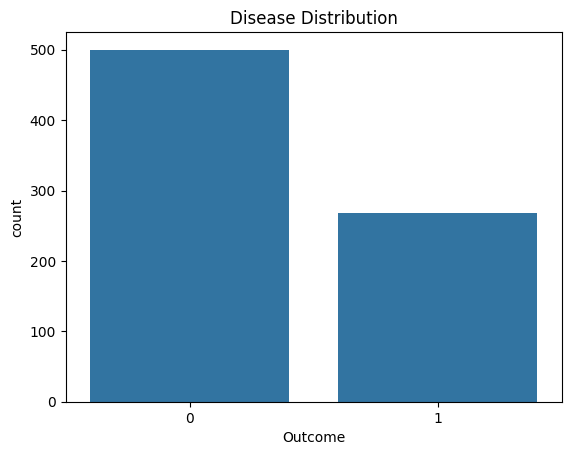

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)   # change 'Outcome' to your column name
plt.title("Disease Distribution")
plt.show()


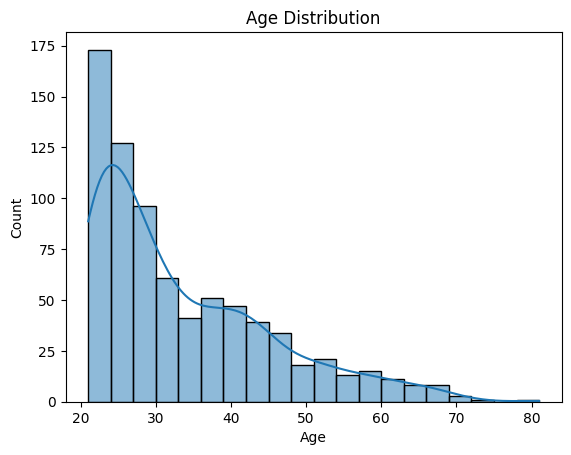

In [7]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


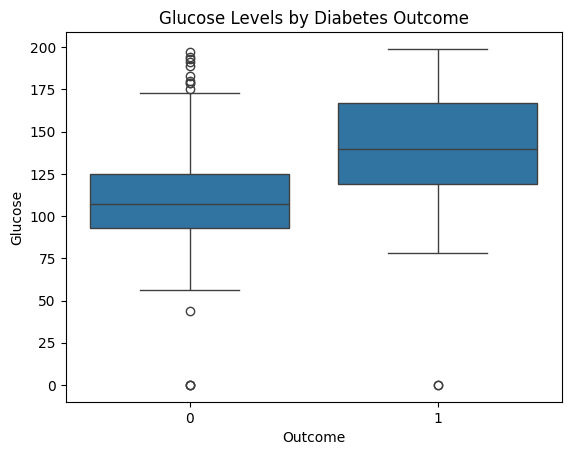

In [11]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()


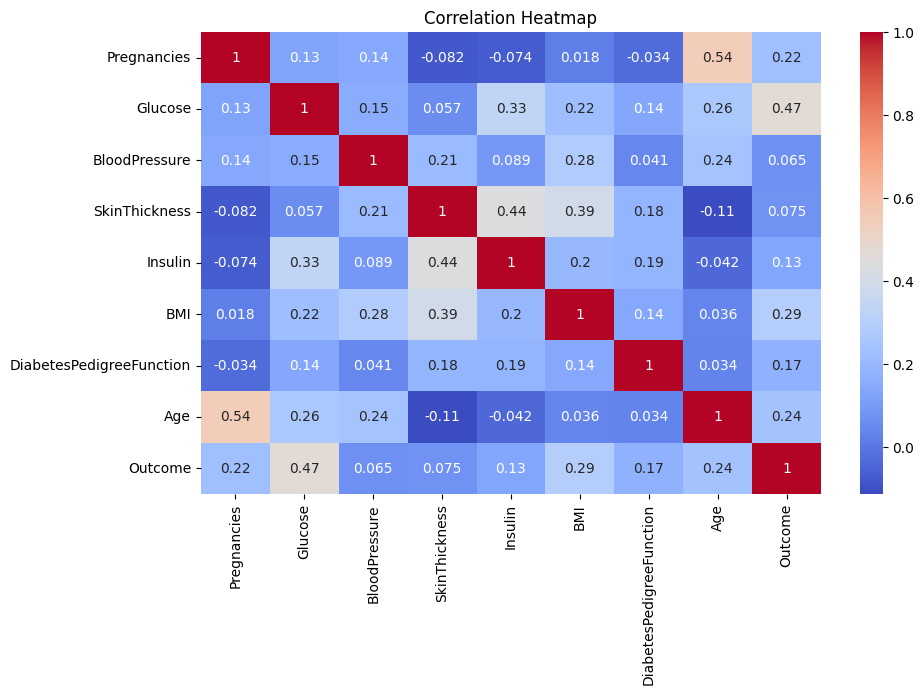

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Older'])

# BMI groups
df['BMIGroup'] = pd.cut(df['BMI'], bins=[0, 25, 30, 100], labels=['Normal', 'Overweight', 'Obese'])

# Glucose groups
df['GlucoseGroup'] = pd.cut(df['Glucose'], bins=[0, 100, 126, 200], labels=['Normal', 'Prediabetic', 'Diabetic'])


AgeGroup
Young          21.582734
Middle-aged    51.851852
Older          46.913580
Name: Outcome, dtype: float64


/tmp/ipython-input-1945985396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df.groupby('AgeGroup')['Outcome'].mean() * 100


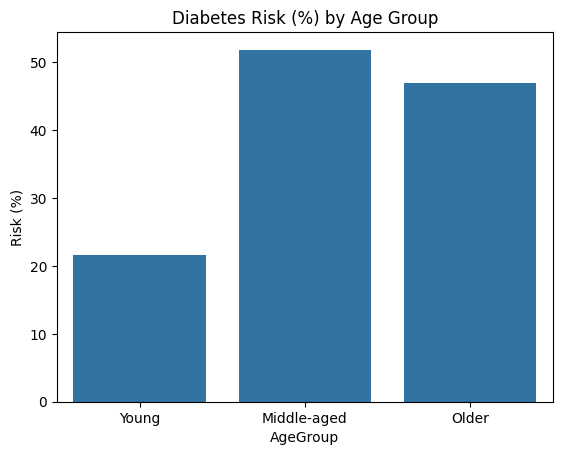

In [14]:
age_risk = df.groupby('AgeGroup')['Outcome'].mean() * 100
print(age_risk)

sns.barplot(x=age_risk.index, y=age_risk.values)
plt.title("Diabetes Risk (%) by Age Group")
plt.ylabel("Risk (%)")
plt.show()


BMIGroup
Normal         6.250000
Overweight    24.444444
Obese         46.236559
Name: Outcome, dtype: float64


/tmp/ipython-input-2666858744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_risk = df.groupby('BMIGroup')['Outcome'].mean() * 100


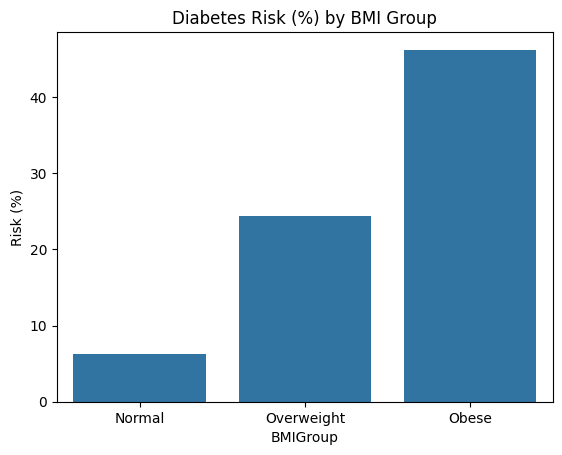

In [15]:
bmi_risk = df.groupby('BMIGroup')['Outcome'].mean() * 100
print(bmi_risk)

sns.barplot(x=bmi_risk.index, y=bmi_risk.values)
plt.title("Diabetes Risk (%) by BMI Group")
plt.ylabel("Risk (%)")
plt.show()


In [16]:
risk_table = df.groupby(['AgeGroup', 'BMIGroup'])['Outcome'].mean() * 100
print(risk_table)


AgeGroup     BMIGroup  
Young        Normal         1.369863
             Overweight    12.000000
             Obese         32.340426
Middle-aged  Normal        13.043478
             Overweight    45.000000
             Obese         58.823529
Older        Normal        18.750000
             Overweight    25.000000
             Obese         67.441860
Name: Outcome, dtype: float64


/tmp/ipython-input-554196570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_table = df.groupby(['AgeGroup', 'BMIGroup'])['Outcome'].mean() * 100


<Figure size 800x600 with 0 Axes>

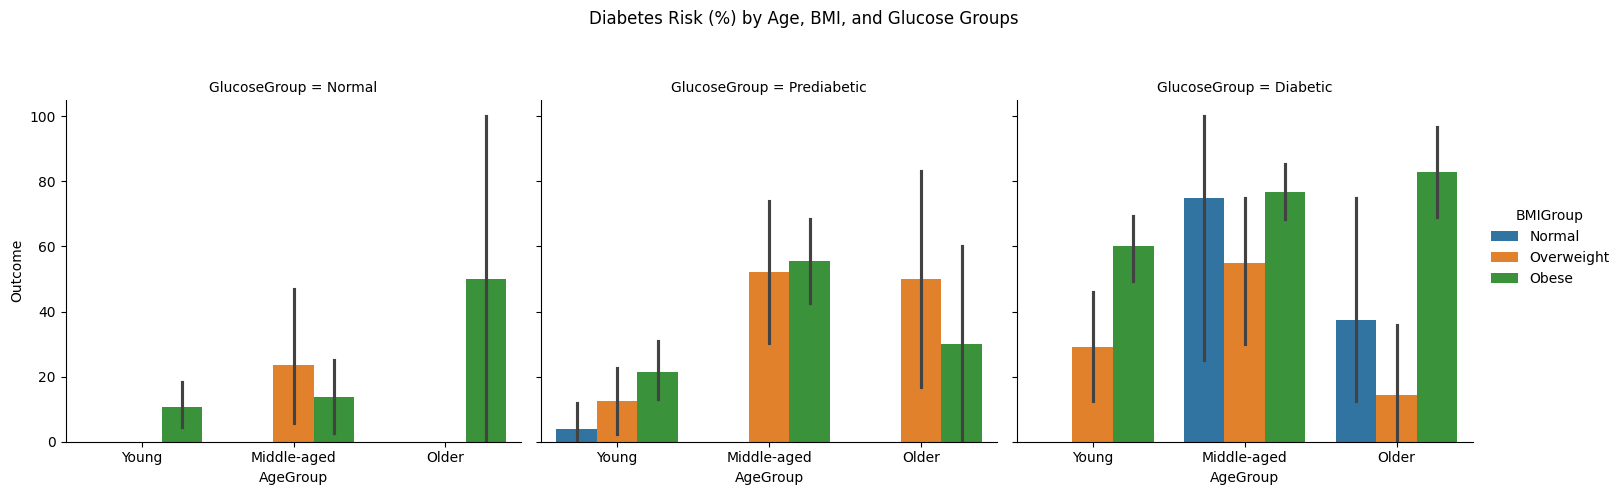

In [17]:
plt.figure(figsize=(8,6))
sns.catplot(x='AgeGroup', y='Outcome', hue='BMIGroup', col='GlucoseGroup',
            data=df, kind='bar', estimator=lambda x: sum(x)/len(x)*100, height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Risk (%) by Age, BMI, and Glucose Groups")
plt.show()
